## Loading/Importing

### Import libraries

In [42]:
''' Import libraries '''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from mlxtend.evaluate import bias_variance_decomp

### Load and scale data

In [2]:
''' Load data '''
file_path = "/Users/bryanmcelvy/Documents/datasets/Heart_Disease_Prediction.csv" # Make sure to change this
df_all = pd.read_csv(file_path).drop(["index"], axis=1)
df = df_all.drop("Heart Disease", axis=1) # DataFrame containing the dataset without the target variable

''' Drop removed feature (FBS over 120) from data '''
df.drop([df.columns[5]], axis=1, inplace=True)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,2,109,0,2.4,2,3,3
1,67,0,3,115,564,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,105,1,0.2,2,1,7
4,74,0,2,120,269,2,121,1,0.2,1,1,3


In [3]:
s_target = df_all["Heart Disease"]       # DataFrame containing only the target variable
labels = [{0: "Absence", 1: "Presence"}]
s_target.head()

0    Presence
1     Absence
2    Presence
3     Absence
4     Absence
Name: Heart Disease, dtype: object

In [4]:
X = df.to_numpy()
y = np.array([1 if (s_target[i] == labels[1]) else 0 for i in df_all.index])

''' Scale data '''
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

''' Split into training and test sets '''
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# K-Nearest Neighbors (KNN) Classifier

## Hyperparameter Tuning

In [5]:
knn_params = {"n_neighbors": np.arange(1, 20, dtype=int),
            "weights": ['uniform', 'distance'],
            "algorithm": ['ball_tree', 'kd_tree', 'brute']}
knn = KNeighborsClassifier()

In [6]:
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, verbose=1)
knn_grid_search_result = knn_grid_search.fit(X_train, y_train)
print("Best Parameters:", knn_grid_search_result.best_params_)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 12, 'weights': 'uniform'}


In [24]:
knn_algo = knn_grid_search_result.best_params_['algorithm']
k = knn_grid_search_result.best_params_['n_neighbors']
knn_weights = knn_grid_search_result.best_params_['weights']

knn = KNeighborsClassifier(n_neighbors=k, algorithm=knn_algo, weights=knn_weights)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=12)

## Cross-validation

In [25]:
knn_cv_score = cross_val_score(knn, X_test, y_test, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {knn_cv_score}")

Cross-Validation Accuracy Score: [0.92857143 0.92857143 0.78571429 0.92307692 0.76923077]


## Performance Evaluation

In [26]:
y_pred_knn = knn.predict(X_test)

### F-Score

In [32]:
print(classification_report(y_test, y_pred_knn, labels=list(labels.keys()), target_names=[labels[0], labels[1]]))

              precision    recall  f1-score   support

     Absence       0.87      1.00      0.93        40
    Presence       1.00      0.79      0.88        28

    accuracy                           0.91        68
   macro avg       0.93      0.89      0.91        68
weighted avg       0.92      0.91      0.91        68



### Bias-Variance Tradeoff

In [8]:
knn_expected_loss, knn_avg_bias, knn_avg_var = bias_variance_decomp(
    knn, X_train, y_train, X_test, y_test, random_seed=42)
print(f"Expected Loss: {knn_expected_loss}\nAvg. Bias: {knn_avg_bias}\nAvg. Variance: {knn_avg_var}")

Expected Loss: 0.13573529411764707
Avg. Bias: 0.10294117647058823
Avg. Variance: 0.06411764705882352


### Confusion Matrix

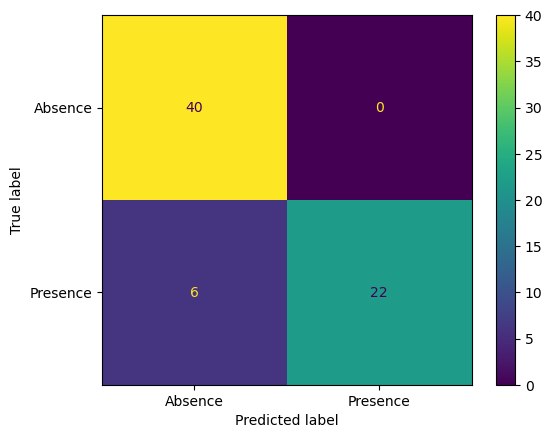

In [44]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_knn, 
    labels=list(labels.keys()), display_labels=[labels[0], labels[1]])

### ROC Curve

In [46]:
FP_rate_knn, TP_rate_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
AUC_knn = roc_auc_score(y_test, y_pred_knn)
print(f"Area under ROC Curve (AUC): {AUC_knn}")

Area under ROC Curve (AUC): 0.8928571428571428


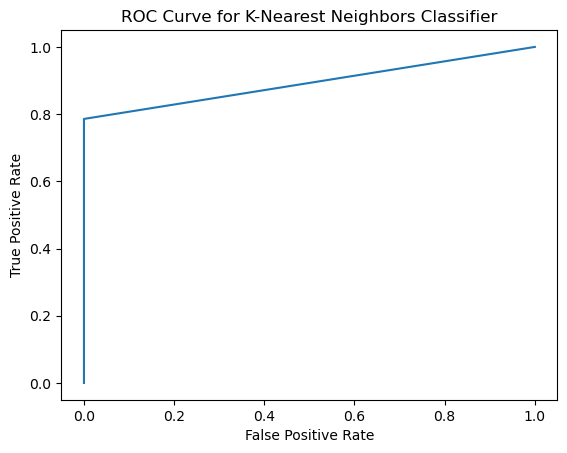

In [50]:
plt.plot(FP_rate_knn, TP_rate_knn)
plt.title("ROC Curve for K-Nearest Neighbors Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Logistic Regression

In [9]:
# ''' Create logistic regression classifier and fit to data '''
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# y_pred_lr = lr.predict(X_test)
# print(classification_report(y_test, y_pred_lr, target_names=labels))

## Hyperparameter Tuning

## Cross-validation

## Performance Evaluation